# Introduction

In this lesson, we will explore how to use machine learning skills to analyze text information.


In [1]:
# want to hide this input cell
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from IPython.display import HTML

HTML('<iframe width="705" height="537" src="https://edpuzzle.com/embed/media/5ec42a899daeb23eef0db888" frameborder="0" allowfullscreen></iframe>')

# Lesson 1. Text Preprocessing

## Lesson 1.1. Removing Special Characters & Stopwords

<font color=blue, size=4>Watch the video and answer the quiz and exercise embedded in the video.<font>

In [2]:
# want to hide this input cell
HTML('<iframe width="705" height="537" src="https://edpuzzle.com/embed/media/5ec42c7edb15be3efbba1879" frameborder="0" allowfullscreen></iframe>')

#### Please run each cell in this Notebook by clicking "Run" button in the Toolbar or by pushing Shift+Enter keys
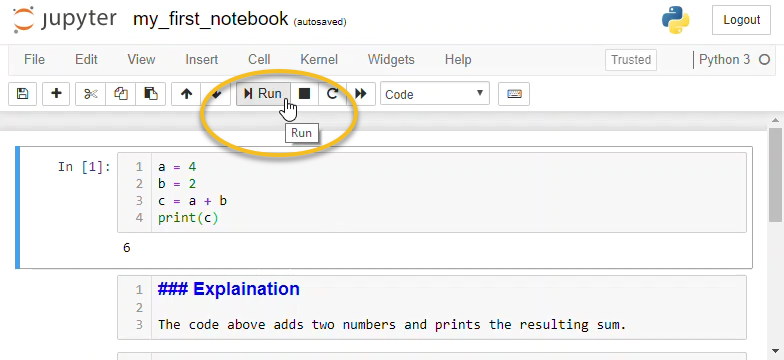

--------------
### 1.1.1. Removing Special Characters

### Functions you will use for removing special characters

#### Please see the example below and the use of function to do the exercise

In [ ]:
import re # import "re" function

def remove_special_characters(text, remove_digits=False):
    '''
    A caret located in a bracket means ‘not.’ 
    If remove_digits parameter is True, "^a-zA-Z0-9\s" matches any characters other than 
    alphabets ([a-zA-Z]) or digits ([0-9]), followed by a white space ([\s]).
    If 'remove_digits' parameter is False, the the function will remove numbers as well. 
    '''
    pattern = r'[^a-zA-Z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

print("Function created!")

#### Sample execution of the function "remove_special_characters"

In [ ]:
remove_special_characters("Well this was fun! What do you think? 123#@", 
                          remove_digits=True)

In [ ]:
remove_special_characters("Well this was fun! What do you think? 123#@", 
                          remove_digits=False)

-------------
### 1.1.2. Removing Stopwords

### Functions you will use for removing stopwords

##### Please see the example below and the use of function to do the exercise

In [ ]:
import nltk # import nltk library

from nltk.corpus import stopwords
from nltk.tokenize.toktok import ToktokTokenizer

print("Packages imported!")

List of stop words from nltk.

In [ ]:
print(stopwords.words('english'))

In [ ]:
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list.remove('no') # we will not remove 'no' from texts
stopword_list.remove('not') # we will not reomve 'not' from texts

def remove_stopwords(text, is_lower_case=False):
    # First, tokenize the text
    tokens = tokenizer.tokenize(text)
    # remove whitespaces in each token
    tokens = [token.strip() for token in tokens]
    # if "is_lower_case" parameter is True, 
    # we will not remove stopwords that have any upper case letter
    if is_lower_case: 
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    # If "is_lower_case" parameter is False, 
    # we will remove any stopwords no matter whether they are in uppercase or not
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

print("Function created!")

#### Sample execution of the function "remove_stopwords"

In [ ]:
remove_stopwords("The, and, if are StopWords, computer is not")

In [ ]:
remove_stopwords("The, and, if are StopWords, computer is not", is_lower_case=True)

# Exercise 1

**Warning**  
<font color = blue, size = 4> 
    Your work will not be saved in Jupyter Notebook. You are recommended to copy your work and paste it to a safe place to record your work.
<font>

Consider a few product reviews that are already annotated:  
  
1. The product is really very good. – POSITIVE  
2. The product seems to be good. – POSITIVE  
3. Good product. I really liked it. – POSITIVE  
4. The product is not good. – NEGATIVE  
5. I didn’t like the product. – NEGATIVE  
  
Remove stop words in each review using the codes provided above and look what happens to the review comments. Critically argue whether stop words removal improves model performance in any context. 

#### Write your code below and push the "Run" button in the tool bar of the Jupyter Notebook to see the result

#### Suggested Answer

In [ ]:
# "Show Solution" Toggle
rm1 = remove_stopwords ("The product is really very good.")
rm2 = remove_stopwords ("The product seems to be good.")
rm3 = remove_stopwords ("Good product. I really liked it.")
rm4 = remove_stopwords ("The product is not good.")
rm5 = remove_stopwords ("I didn’t like the product.")

print(rm1)
print(rm2)
print(rm3)
print(rm4)
print(rm5)

'''
The meaning of Review 5 is changed after removing stop words. This is because the
NLTK's stopword list contains contractions of negative expressions like 'didn't," 
"doesn't," "hadn't," etc.
Removing stop words, especially when it comes to negative contractions like 'didn't,' 
can change the meaning of an original text. We should remove stop words with care.
'''

--------------
# Lesson 1.2. Stemming & Lemmatization

<font color=blue, size=4>Watch the video and answer the quiz and exercise embedded in the video.<font>

In [3]:
# Want to hide this input cell

HTML('<iframe width="705" height="537" src="https://edpuzzle.com/embed/media/5ec0aeb22f4e7c3f03a29d60" frameborder="0" allowfullscreen></iframe>')

### 1.2.1. Stemming

### Functions you will use for stemming

#### Please see the example below and the use of function to do the exercise

In [ ]:
def simple_stemmer(text):
    ps = nltk.porter.PorterStemmer()
    # split the text into individual word and return a list of words
    # the 'ps' function stems each word, and .join() function joins the stemmed words with whitespace.
    text = ' '.join([ps.stem(word) for word in text.split()]) 
    return text

print("Function created!")

#### Sample execution of the function "simple_stemmer"

In [ ]:
simple_stemmer("My system keeps crashing his crashed yesterday, ours crashes daily")

---------------
## 1.2.2. Lemmatization

### Functions you will use for lemmatization

#### Please see the example below and the use of function to do the exercise

In [ ]:
from nltk.stem import WordNetLemmatizer #

wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    s = " " # create an empty string that later will contain lemmatized words,
    t_l = [] # create an empty list
    t_w = nltk.word_tokenize(text) # tokenize the text
    # assign the list of tokenized words into t_w.
    for w in t_w:
        # “pos” is a part of speech parameter and “v” means verbs. 
        # We will lemmatize verbs only. 
        l_w = wordnet_lemmatizer.lemmatize(w, pos="v")
        # append l_w into the list t_l
        t_l.append(l_w)
    # joint the tokens to make a complete sentence
    text = s.join(t_l)
    return text

print("Function created!")

#### Sample execution of the function "lemmatize_text"

In [ ]:
lemmatize_text("My system keeps crashing! his was crashed yesterday, ours crashes daily")

# Exercise  2

**Warning**  
<font color = blue, size = 4> 
    Your work will not be saved in Jupyter Notebook. You are recommended to copy your work and paste it to a safe place to record your work.
<font>

Using the code provided in Jupyter Notebook, 1) remove special characters (including numbers) and stopwords, and 2) lemmatize the following paragraph. 
  
“We measured the serum lipid profile, together with plasma fibrinogen and serum lipoprotein(a) (Lp[a]), glucose, bilirubin, and albumin levels in 491 patients (310 men) who were referred for the management of primary dyslipidemia. All these variables have been shown to predict vascular events. The patients were not taking lipid-lowering drugs; hypertension was present in 156 (31.7%) of them. Of the hypertensive patients, 52 (33%) were not receiving any treatment to control their blood pressure. Lipid-hostile antihypertensive drugs were associated with a significantly higher fibrinogen concentration when compared with untreated hypertensives or those taking lipid-neutral/lipid-friendly drugs (median values: 383, 353, and 336 mg/dL, respectively; P < .01). Lipid-neutral/lipid-friendly antihypertensive drugs were associated with lower Lp(a) levels when compared with untreated hypertensives (median values: 22 and 45 mg/dL, respectively; P < .05). The serum bilirubin level was significantly lower in the untreated hypertensives when compared with normotensives or the treated hypertensives. There were no significant differences in lipids, glucose, or albumin among the groups of hypertensives or normotensives. The influence of antihypertensive drugs on additional cardiovascular risk factors should be considered when selecting medication to reduce blood pressure.”

*Hint*: create interim objects to store the preprocessed text on the way to a final product.  
  
*Example*:  
  
rm_sc = remove_special_characters("blablabla...")   
rm_sw = remove_stopwords(rm_sc)  
...


#### Write your code below and push the "Run" button in the tool bar of the Jupyter Notebook to see the result.

#### Suggested Answer

In [ ]:
# "Show Solution" Toggle
text = "We measured the serum lipid profile, together with plasma fibrinogen and serum lipoprotein(a) (Lp[a]), glucose, bilirubin, and albumin levels in 491 patients (310 men) who were referred for the management of primary dyslipidemia. All these variables have been shown to predict vascular events. The patients were not taking lipid-lowering drugs; hypertension was present in 156 (31.7%) of them. Of the hypertensive patients, 52 (33%) were not receiving any treatment to control their blood pressure. Lipid-hostile antihypertensive drugs were associated with a significantly higher fibrinogen concentration when compared with untreated hypertensives or those taking lipid-neutral/lipid-friendly drugs (median values: 383, 353, and 336 mg/dL, respectively; P < .01). Lipid-neutral/lipid-friendly antihypertensive drugs were associated with lower Lp(a) levels when compared with untreated hypertensives (median values: 22 and 45 mg/dL, respectively; P < .05). The serum bilirubin level was significantly lower in the untreated hypertensives when compared with normotensives or the treated hypertensives. There were no significant differences in lipids, glucose, or albumin among the groups of hypertensives or normotensives. The influence of antihypertensive drugs on additional cardiovascular risk factors should be considered when selecting medication to reduce blood pressure."
rm_sc = remove_special_characters(text)
rm_sw = remove_stopwords(rm_sc)
final_text = lemmatize_text(rm_sw)

print(final_text)